In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [25]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [46]:
car = cv2.imread('/media/juan/juan1/pyimage_univ/OCR/colonia/images.jpeg')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

In [47]:
# Highest Pixel Frequency

#count the number of occurrences in each pixel value.
#reshape the image data structure to only give us a list of 3 values (one for each R, G, and B channel intensity).
car.reshape(-1,3)

array([[133, 104,  88],
       [122,  95,  78],
       [112,  85,  68],
       ...,
       [176, 178, 164],
       [176, 178, 164],
       [177, 179, 165]], dtype=uint8)

In [48]:
car.shape

(194, 259, 3)

In [49]:
#Now that we have the data in the right structure, we can start counting the frequency of the pixel values. 
unique, counts = np.unique(car.reshape(-1,3), axis=0, return_counts=True)

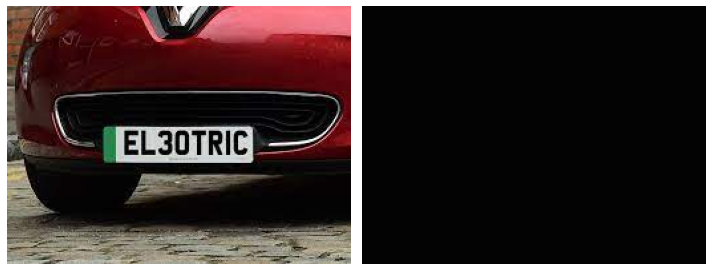

In [50]:
img_temp = car.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]
show_img_compar(car, img_temp)

In [51]:
from sklearn.cluster import KMeans

In [52]:
clt = KMeans(n_clusters=3)

In [53]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

KMeans(n_clusters=3)


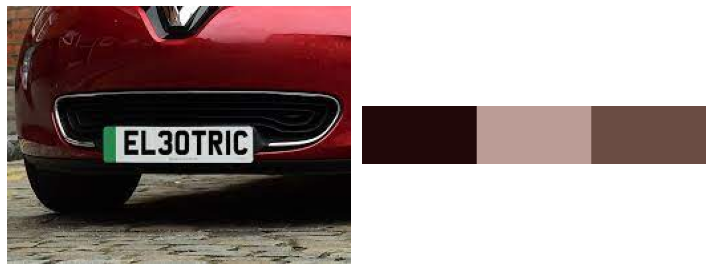

In [54]:
clt_1 = clt.fit(car.reshape(-1, 3))
print(clt_1)
show_img_compar(car, palette(clt_1))

In [55]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

{0: 0.62, 1: 0.2, 2: 0.18}
[[ 34.32339317   9.14006305   9.82969826]
 [188.2370261  157.16051206 150.92240276]
 [107.8575236   78.62731816  69.0858412 ]]


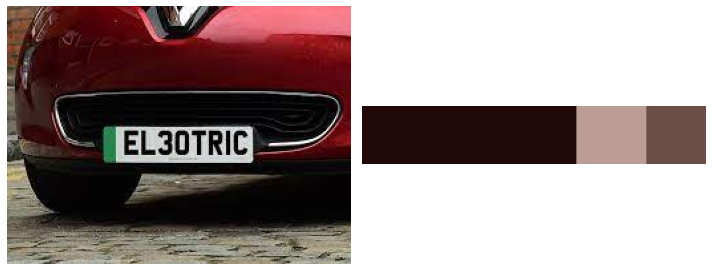

In [56]:
clt_1 = clt.fit(car.reshape(-1, 3))
show_img_compar(car, palette_perc(clt_1))